In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


INSTALLING KAGGLE LIBRARY

In [ ]:
! pip install kaggle

UPLOAD THE kaggle.json file

In [ ]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**DATA COLLECTION** - IMPORTING KAGGLE TWITTER SENTIMENT DATASET

In [ ]:
# API to fetch the dataset from kaggle
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 98% 79.0M/80.9M [00:00<00:00, 821MB/s]
100% 80.9M/80.9M [00:00<00:00, 817MB/s]


In [ ]:
# Extracting the compressed csv dataset from the zip file

from zipfile import ZipFile   # 'zipfile' is a lirary in python & 'ZipFile' is a module
dataset = '/content/sentiment140.zip'  # path of the compressed file that we want to extract

with ZipFile(dataset,'r') as zip:     # opening the file in read mode
  zip.extractall()
  print('Dataset is extracted')

Dataset is extracted


**IMPORTING THE DEPENDENCIES (LIBRARIES AND MODULES)**

In [ ]:
!pip install wordcloud

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re   # regular expression (for pattern matching)
from nltk.corpus import stopwords  # nltk -> natural langage toolkit  ;  stopwords -> a, an, the, is, for, by, my, etc. (nltk=library , corpus=module)
from nltk.stem.porter import PorterStemmer  # Stemming -> reducing a word into it's root/key word
from sklearn.feature_extraction.text import TfidfVectorizer  # It changes the textual data into numerical data, so that we can feed it to the ML model
from sklearn.model_selection import train_test_split   # It splits entire data into training and testing data ; training data -> trains ML model, test data -> tests/evaluates the model
from sklearn.linear_model import LogisticRegression  # LR is the ML model that we our using
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Downloading the stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Printing the stopwords in English
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

**EDA (EXPLORATORY DATA ANALYSIS)**

In [ ]:
# Loading the data from csv file to pandas dataframe
twitter_data= pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding="ISO-8859-1")

In [ ]:
# Printing the first 5 rows
twitter_data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


Here, pd.read_csv is not reading the column names ; it's considering the first data row as the column names

In [ ]:
# Naming the columns and reading the dataset again

column_names=['target','ids','date','flag','user','text']
twitter_data= pd.read_csv('/content/training.1600000.processed.noemoticon.csv', names=column_names, encoding="ISO-8859-1")

In [ ]:
# Again printing the first 5 rows
twitter_data.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# printing any 8 rows
twitter_data.sample(8)

,target,ids,date,flag,user,text
1318244,4,2014351008,Wed Jun 03 01:14:28 PDT 2009,NO_QUERY,Rainbowsh,Sunshine today
31875,0,1564120719,Mon Apr 20 01:52:50 PDT 2009,NO_QUERY,bullitt33,@xanister It ain't that easy Right now I'd s...
546345,0,2201726354,Tue Jun 16 20:41:06 PDT 2009,NO_QUERY,stevegchavez,@MarlaLeinaala I think we only need yellow pai...
288952,0,1994784541,Mon Jun 01 12:27:16 PDT 2009,NO_QUERY,Rachhy,@gfalcone601 that charice is over 1000 votes i...
1043914,4,1957380816,Fri May 29 00:19:30 PDT 2009,NO_QUERY,serpman,Just saw 12:01AM showing of #Pixar 's #Up in 3...
345659,0,2015967518,Wed Jun 03 05:54:19 PDT 2009,NO_QUERY,scodal,@GoddessSabre yikes flooding! wow cant believe...
229257,0,1978441108,Sat May 30 23:21:58 PDT 2009,NO_QUERY,curari,@AdamBMusic Wow! I tried to get my brother to ...
1041911,4,1957136785,Thu May 28 23:37:13 PDT 2009,NO_QUERY,ThePatient94,Mmm peanut butter


In [ ]:
# Printing the number of rows and columns of the dataset
twitter_data.shape

(1600000, 6)

In [ ]:
# Printing the information of the data in the columns
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
# Printing the statistics
twitter_data.describe()

,target,ids
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [ ]:
# Checking the ditribution of traget column
twitter_data['target'].value_counts()

,count
target,
0,800000
4,800000


In [ ]:
# Counting the number of missing values in each column
twitter_data.isnull().sum()

,0
target,0
ids,0
date,0
flag,0
user,0
text,0


**GRAPHS & CHARTS**

Sentiment Dsitribution Bar Chart (Shows Class balance)

/tmp/ipython-input-1421257517.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=twitter_data, palette='viridis')


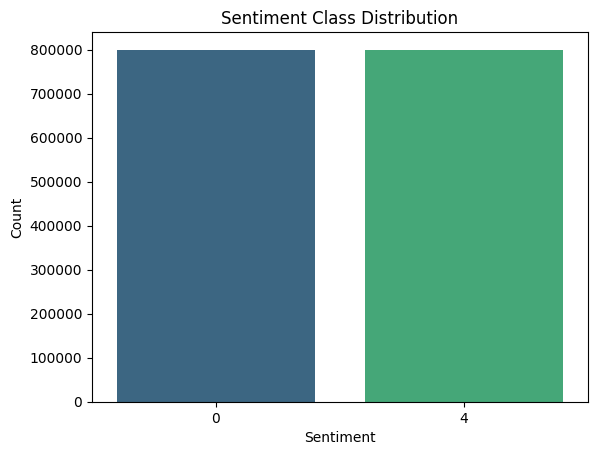

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='target', data=twitter_data, palette='viridis')
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Tweet Length Distribution

In [ ]:
twitter_data['tweet_length'] = twitter_data['text'].apply(len)
twitter_data.head()

,target,ids,date,flag,user,text,tweet_length
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111


Tweet Length Distribution Histogram

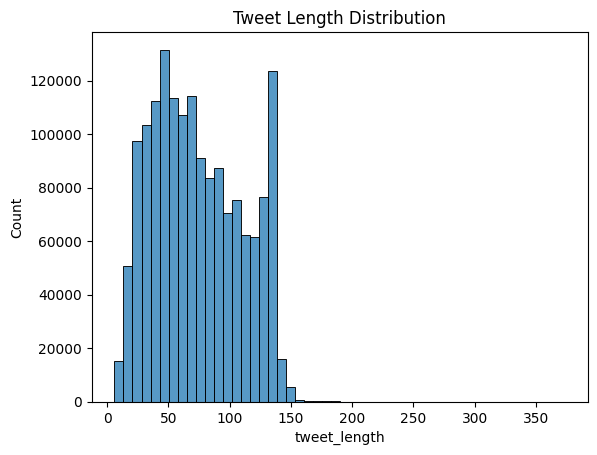

In [ ]:
sns.histplot(twitter_data['tweet_length'], bins=50)
plt.title("Tweet Length Distribution")
plt.show()

Tweet Length Distribution Pie Chart

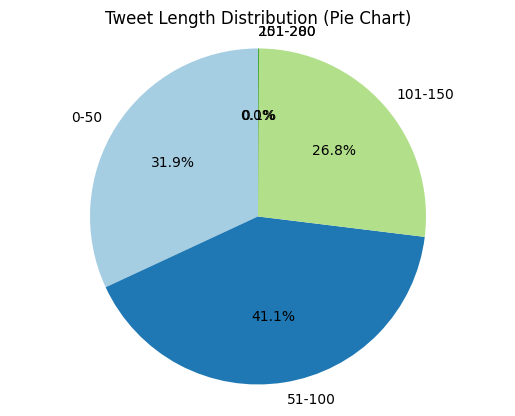

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate tweet length
twitter_data['tweet_length'] = twitter_data['text'].apply(len)

# Define categories
bins = [0, 50, 100, 150, 200, 280]  # Twitter max length = 280 chars
labels = ['0-50', '51-100', '101-150', '151-200', '201-280']

# Categorize tweets
twitter_data['length_category'] = pd.cut(twitter_data['tweet_length'], bins=bins, labels=labels, right=True)

# Count category frequencies
length_counts = twitter_data['length_category'].value_counts().sort_index()

# Plot pie chart
plt.pie(length_counts, labels=length_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Tweet Length Distribution (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio for perfect circle
plt.show()

Word Clouds - for each sentiment (positive & negative tweets)

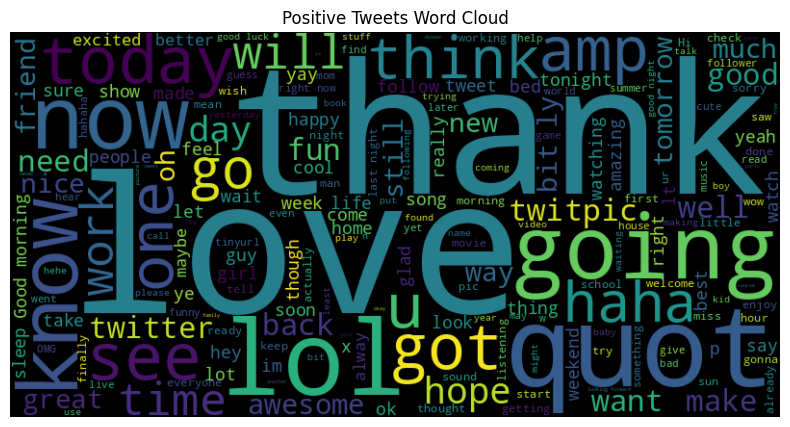

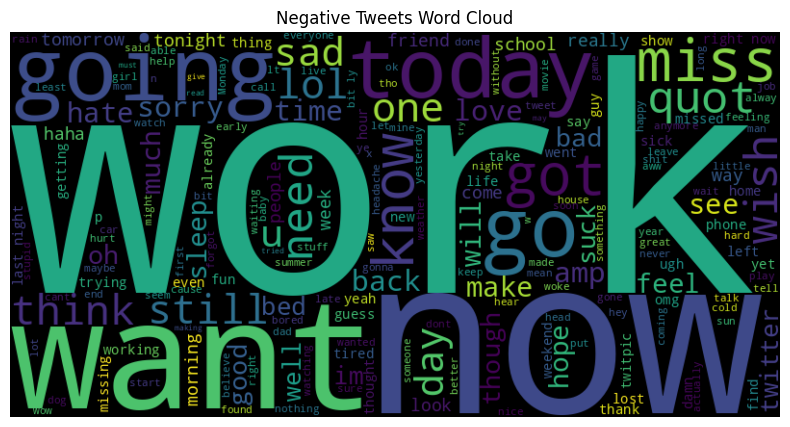

In [ ]:
from wordcloud import WordCloud

pos_text = " ".join(twitter_data[twitter_data['target'] == 4]['text'])
neg_text = " ".join(twitter_data[twitter_data['target'] == 0]['text'])

# Positive tweets word cloud
pos_wc = WordCloud(width=800, height=400).generate(pos_text)
plt.figure(figsize=(10, 5))
plt.imshow(pos_wc, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Tweets Word Cloud")
plt.show()

# Negative tweets word cloud
neg_wc = WordCloud(width=800, height=400).generate(neg_text)
plt.figure(figsize=(10, 5))
plt.imshow(neg_wc, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Tweets Word Cloud")
plt.show()


Most Frequently Used Words

/tmp/ipython-input-2706962931.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=common_words, palette='crest')


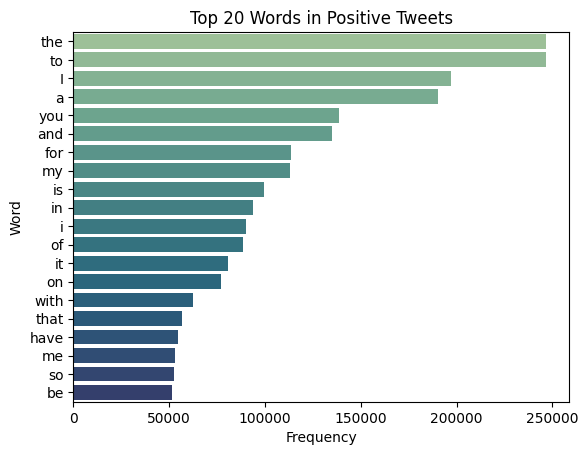

/tmp/ipython-input-2706962931.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=common_words, palette='crest')


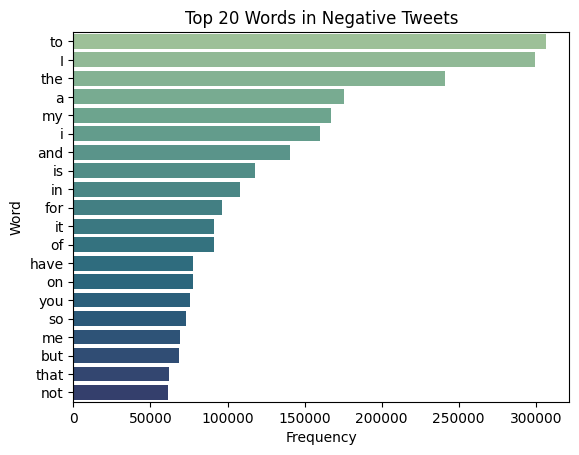

In [ ]:
from collections import Counter
import pandas as pd

# Positive tweets
positive_words = " ".join(twitter_data[twitter_data['target']==4]['text']).split()
word_freq = Counter(positive_words)
common_words = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])

sns.barplot(x='Frequency', y='Word', data=common_words, palette='crest')
plt.title('Top 20 Words in Positive Tweets')
plt.show()

# Negative Tweets
negative_words = " ".join(twitter_data[twitter_data['target']==0]['text']).split()
word_freq = Counter(negative_words)
common_words = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])

sns.barplot(x='Frequency', y='Word', data=common_words, palette='crest')
plt.title('Top 20 Words in Negative Tweets')
plt.show()

**DATA PREPROCESSING**

Converting the target label for positive tweets from '4' -> '1'

In [ ]:
twitter_data.replace({'target':{4:1}},inplace=True)

In [ ]:
twitter_data.sample(5)

,target,ids,date,flag,user,text,tweet_length
1413609,1,2056877500,Sat Jun 06 11:57:52 PDT 2009,NO_QUERY,Pir8t,Hubby and I are going to drive over to Ann Arb...,124
397112,0,2056547434,Sat Jun 06 11:20:42 PDT 2009,NO_QUERY,wyldflamez,I just drooled on myself.,26
542423,0,2200429569,Tue Jun 16 18:53:20 PDT 2009,NO_QUERY,misscarleyjean,"watching tv, eating food. @etothemilie is my B...",108
129569,0,1835131908,Mon May 18 05:13:34 PDT 2009,NO_QUERY,GiCiSanchez,Heading to work.,17
596469,0,2219029623,Wed Jun 17 23:38:46 PDT 2009,NO_QUERY,Batsu_Sama,@crispinfreeman Don't ya just love non-disclos...,116


In [ ]:
# Checking the ditribution of traget column
twitter_data['target'].value_counts()

,count
target,
0,800000
1,800000


'0' --> Negative Tweet


'1' --> Positive Tweet

Dropping columns that are not required

In [ ]:
twitter_data= twitter_data.drop(columns=['ids', 'date', 'flag', 'user'])

In [ ]:
twitter_data.head()

,target,text,tweet_length
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111


In [ ]:
twitter_data.shape

(1600000, 3)

Removing Dupliactes

In [ ]:
twitter_data = twitter_data.drop_duplicates(subset='text')

In [ ]:
twitter_data.shape

(1581466, 3)

**DATA CLEANING**

**STEMMING** - Process of reducing a word into it's key/root word

Example - actor,actress,acting = act

&

**REMOVING NOISY TWEETS** - like the ones having emojis, urls, etc which do not affect the sentiment of the tweet

&

**REMOVAL OF STOPWORDS** - Removing words like 'a','an','my', etc. that do not directly affect the sentiment of the tweet

from nltk.stem.porter import PorterStemmer
import re

port_stem = PorterStemmer()

def stemming(content):    # we will pass the text column as content in this stemming function
  stemmed_content= re.sub('[^a-zA-Z]'," ", content)   # Removing everything that is not a lowercase or uppercase letter in the tweet (eg- @,;,etc.)
  stemmed_content= stemmed_content.lower()   # converting upper case letters to lower case letters
  stemmed_content= stemmed_content.split()   # split all the stemmed content words from the teweet and store them in a list
  stemmed_content= [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]   # Performing stemming & Keeping only the words in the processed stem content that do not belong to the stopwords
  stemmed_content= ' '.join(stemmed_content)   # Joining all the words of stem content of a tweet into a single tweet

  return stemmed_content

- Applying the 'stemming' function to the dataset we have
- Creating a new column called 'stemmed_content'

twitter_data['stemmed_content']= twitter_data['text'].apply(stemming)

In [ ]:
'''
from nltk.stem.porter import PorterStemmer
import re

port_stem = PorterStemmer()
'''

'\nfrom nltk.stem.porter import PorterStemmer\nimport re\n\nport_stem = PorterStemmer()\n'

In [ ]:
'''
def stemming(content):    # we will pass the text column as content in this stemming function
  stemmed_content= re.sub('[^a-zA-Z]'," ", content)   # Removing everything that is not a lowercase or uppercase letter in the tweet (eg- @,;,etc.)
  stemmed_content= stemmed_content.lower()   # converting upper case letters to lower case letters
  stemmed_content= stemmed_content.split()   # split all the stemmed content words from the teweet and store them in a list
  stemmed_content= [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]   # Performing stemming & Keeping only the words in the processed stem content that do not belong to the stopwords
  stemmed_content= ' '.join(stemmed_content)   # Joining all the words of stem content of a tweet into a single tweet

  return stemmed_content
'''

'\ndef stemming(content):    # we will pass the text column as content in this stemming function\n  stemmed_content= re.sub(\'[^a-zA-Z]\'," ", content)   # Removing everything that is not a lowercase or uppercase letter in the tweet (eg- @,;,etc.)\n  stemmed_content= stemmed_content.lower()   # converting upper case letters to lower case letters\n  stemmed_content= stemmed_content.split()   # split all the stemmed content words from the teweet and store them in a list\n  stemmed_content= [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words(\'english\')]   # Performing stemming & Keeping only the words in the processed stem content that do not belong to the stopwords\n  stemmed_content= \' \'.join(stemmed_content)   # Joining all the words of stem content of a tweet into a single tweet\n\n  return stemmed_content\n'

In [ ]:
'''
# Applying the 'stemming' function to the dataset we have
# Creating a new column called 'stemmed_content'

twitter_data['stemmed_content']= twitter_data['text'].apply(stemming)
'''

"\n# Applying the 'stemming' function to the dataset we have\n# Creating a new column called 'stemmed_content'\n\ntwitter_data['stemmed_content']= twitter_data['text'].apply(stemming)\n"

**LEMMATIZATION**

In [ ]:
# ADVANCED TEXT PREPROCESSING

# This step cleans the tweets more aggressively than before to reduce noise and improve accuracy.

import re
import string
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_tweet(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove usernames
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags symbol (keep the text)
    text = re.sub(r'#', '', text)
    # Remove emojis and non-ASCII
    text = text.encode('ascii', 'ignore').decode('ascii')
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove repeated characters (e.g., loooove -> love)
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    # Tokenize and remove stopwords
    words = text.split()
    words = [w for w in words if w not in stop_words]
    # Lemmatize words
    words = [lemmatizer.lemmatize(w) for w in words]
    return " ".join(words)

# Apply cleaning to the dataset
twitter_data['clean_tweet'] = twitter_data['text'].apply(clean_tweet)
print("Sample cleaned tweets:", twitter_data['clean_tweet'].head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Sample cleaned tweets: 0        thats bummer shoulda got david carr third day
1    upset cant update facebook texting might cry r...
2      dived many time ball managed save rest go bound
3                      whole body feel itchy like fire
4                             behaving im mad cant see
Name: clean_tweet, dtype: object


In [ ]:
twitter_data.sample(5)

,target,text,tweet_length,clean_tweet
1274834,1,@INKDMOM Time to pass out...night babe,39,time pas outnight babe
737765,0,"oh well i think i better go just now, cos i re...",93,oh well think better go co really need get hom...
395423,0,@EpsteinHMNY running camp?!? no tour no blink...,55,running camp tour blink good
350236,0,@mileycyrus are you going to tour to london? c...,117,going tour london come back didnt manage get s...
565889,0,@Ben_Ari for sure. I am greatt just a little t...,88,sure greatt little tired gloomy weather depres...


In [ ]:
twitter_data.shape

(1581466, 4)

In [ ]:
print(twitter_data['clean_tweet'])

0              thats bummer shoulda got david carr third day
1          upset cant update facebook texting might cry r...
2            dived many time ball managed save rest go bound
3                            whole body feel itchy like fire
4                                   behaving im mad cant see
                                 ...                        
1599995                        woke school best feeling ever
1599996               thewdbcom cool hear old walt interview
1599997                       ready mojo makeover ask detail
1599998     happy th birthday boo al time tupac amaru shakur
1599999                                 happy charitytuesday
Name: clean_tweet, Length: 1581466, dtype: object


In [ ]:
# Separating the data (tweet/text) and label(target)
X= twitter_data['clean_tweet'].values
Y= twitter_data['target'].values

In [ ]:
print(X)

['thats bummer shoulda got david carr third day'
 'upset cant update facebook texting might cry result school today also blah'
 'dived many time ball managed save rest go bound' ...
 'ready mojo makeover ask detail'
 'happy th birthday boo al time tupac amaru shakur' 'happy charitytuesday']


In [ ]:
print(Y)

[0 0 0 ... 1 1 1]


**TRAIN-TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# X_train, X_test, Y_train, Y_test are the 4 arrays
# X_train contains all the training data tweets and their corresponding targets are stored in the Y_train
# X_test contains all the test data tweets and their corresponding targets are stored in the Y_test
# test_size= 0.2 --> means 20% of the data is test data and the rest 80% data is used for training the ML model
# stratify=Y --> means that in the training Y_train data & the testing Y_test data , I want an almost equal proportion of 0 and 1 from the target column
# random_state= 'any no' --> everyone using the same value of random_state will have the same rows in the test data and the train data

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1581466,) (1265172,) (316294,)


In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1581466,) (1265172,) (316294,)


In [ ]:
print(X_train)

['amp mo likely gotta go work lol'
 'happy anniversary today year th love honey'
 'wanna see friend anybody im bored' ...
 'met mutya bueno last nyt rly nice' 'go nkotb show last night go'
 'yanew tweet dont show']


In [ ]:
print(X_test)

['kristin way timminsnot seen nearly year'
 'yr ago buat per situ long u punya planned trip lama pun susah everything mahal tiru'
 'hope chat best friend tonight' ...
 'oh long doesnt kill u lol jeez p beddybaws time' 'good morning world'
 'school world weekmy school silly anyway look bright side im u']


**FEATURE EXTRACTION**

**TF-IDF Vectorizer** --> used to convert textual/raw data into numerical data, that the model can understand, based on the weights given to each word or phrase depeding on it's frequency. Lesser the frequency of a word, more is the wight associated to it.

Then the ML model will associate the numerical data,i.e, weights associated to the words/phrases to the target labels(0 or 1) and work on it.

TF-IDF stands for Term Frequency – Inverse Document Frequency.

It assigns a weight to each word (or phrase) based on:

Term Frequency (TF) → How often the word appears in a tweet.

Inverse Document Frequency (IDF) → How rare the word is across all tweets.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

In [ ]:
X_train= vectorizer.fit_transform(X_train)
X_test= vectorizer.transform(X_test)

In [ ]:
print(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8733365 stored elements and shape (1265172, 325039)>
  Coords	Values
  (0, 9144)	0.29513006784877166
  (0, 173169)	0.5133666545477943
  (0, 153187)	0.5428856595373139
  (0, 107402)	0.38440283520125607
  (0, 105244)	0.2521652618386423
  (0, 315246)	0.26218235711760585
  (0, 155606)	0.27301215054656797
  (1, 114222)	0.31211856624910034
  (1, 11053)	0.5257053598212916
  (1, 283931)	0.254828450999799
  (1, 320343)	0.340994897242157
  (1, 277109)	0.375190803272139
  (1, 157435)	0.2550544229724631
  (1, 122250)	0.48906023998666776
  (2, 305865)	0.3975293439872083
  (2, 245885)	0.32421146743274415
  (2, 97469)	0.36742656492646986
  (2, 11846)	0.6026085767149088
  (2, 128414)	0.23156244039244708
  (2, 32661)	0.43022878089415095
  (3, 165358)	0.46621813991636457
  (3, 0)	0.7723862499541603
  (3, 251181)	0.4313468753737235
  (4, 277770)	0.4921366812513241
  (4, 8376)	0.5883923449717514
  :	:
  (1265168, 118632)	0.2377191961262731
  (1

In [ ]:
print(X_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2126080 stored elements and shape (316294, 325039)>
  Coords	Values
  (0, 146742)	0.6326275484838979
  (0, 182868)	0.4764503139582337
  (0, 246018)	0.3999376504607745
  (0, 307101)	0.3115692364408647
  (0, 320343)	0.3402234117104901
  (1, 4191)	0.1849357373901342
  (1, 36981)	0.2949938572958015
  (1, 84484)	0.17629225815284422
  (1, 148453)	0.30965111855838134
  (1, 156383)	0.15186560913742306
  (1, 161418)	0.32017733927230896
  (1, 203848)	0.24225500989540671
  (1, 207930)	0.23052578399693527
  (1, 215931)	0.2770652468733744
  (1, 216067)	0.3342169529470392
  (1, 254040)	0.375555258241815
  (1, 270807)	0.3287016872496029
  (1, 289331)	0.18518410004154676
  (1, 323121)	0.20630675750301414
  (2, 26305)	0.43733307946636324
  (2, 45653)	0.5840057551475631
  (2, 97469)	0.4037328665438228
  (2, 122633)	0.3789514865202722
  (2, 285768)	0.4013385091109196
  (3, 19643)	0.5535553303054069
  :	:
  (316290, 27093)	0.4274129396416051
  

All the words in each tweet get associated to a numerical value.

Example - here all the words in the tweet with 0 index are converted to numerical data

  (0, 222329)	0.45902566553974955
  (0, 286158)	0.36307656788596043
  (0, 358197)	0.30487157492746747
  (0, 408896)	0.663912210812278
  (0, 436771)	0.23863127215930252
  (0, 453351)	0.25845668749555184

**MODEL SELECTION AND TRAINING**

MODEL - **LOGISTIC REGRESSION**

LR is a classification model. Here, we have 2 classes - positive tweet & negative tweet

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model= LogisticRegression(max_iter=1000)  # Max_iter --> means the maximum no of times (iterations) that the model has to go through the data


In [ ]:
model.fit(X_train, Y_train)  # Here, the model tries to map the words to positive or negative tweets

LogisticRegression(max_iter=1000)

**MODEL EVALUATION**

ACCURACY SCORE

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Accuracy score on the training data
X_train_prediction= model.predict(X_train)    # Here, we just gave the model X_train data and now it will compute wether each tweet is a positive tweet('1') or negative tweet('0')
training_data_accuracy= accuracy_score(X_train_prediction, Y_train)   # Here, we will compare the accuracy between the actual Y_train and the prediction of the model


In [ ]:
print('The accuracy score on the training data is : ', training_data_accuracy)

The accuracy score on the training data is :  0.7942311401137553


In [ ]:
# Accuracy score on the testing data
X_test_prediction= model.predict(X_test)
testing_data_accuracy= accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('The accuracy score on the test data is : ', testing_data_accuracy)

The accuracy score on the test data is :  0.7823354221072799


CLASSIFICATION REPORT

In [ ]:
print("\nClassification Report:\n", classification_report(Y_test, X_test_prediction))


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.78    158037
           1       0.77      0.80      0.79    158257

    accuracy                           0.78    316294
   macro avg       0.78      0.78      0.78    316294
weighted avg       0.78      0.78      0.78    316294



CONFUSION MATRIX

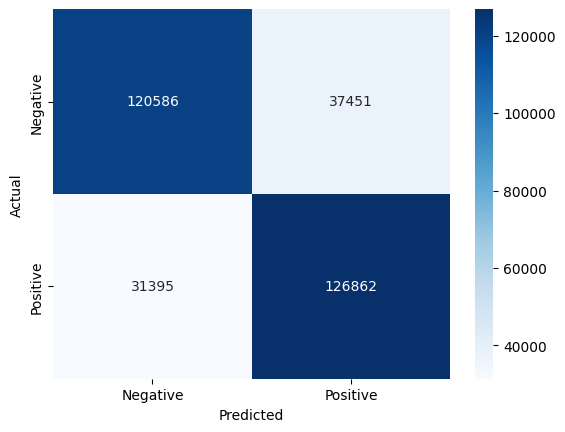

In [ ]:
cm = confusion_matrix(Y_test, X_test_prediction)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**SAVING MODEL FOR DEPLOYMENT**

In [ ]:
import pickle

In [ ]:
filename='trained_LE_model.sav'
pickle.dump(model,open(filename,'wb'))  # 'wb' --> means write-binary

**USING THE SAVED MODEL FOR PREDICTION ON NEW TWEETS**

In [ ]:
# Loading the saved model
loaded_model= pickle.load(open('/content/trained_LE_model.sav','rb'))

In [ ]:
X_new = X_test[23098]   # Randomly testing for the 23090th tweet of the X_test
print(Y_test[23098])

prediction = loaded_model.predict(X_new)
print(prediction)    # 'prediction' is stored in the form of a list

if (prediction[0]==0):     # prediction[0] --> means the first value from this 'prediction' list
  print('The tweet is negative')
else:
  print('The tweet is positive')

0
[0]
The tweet is negative


In [ ]:
X_new = X_test[98]   # Randomly testing for the 23090th tweet of the X_test
print(Y_test[98])

prediction = loaded_model.predict(X_new)
print(prediction)    # 'prediction' is stored in the form of a list

if (prediction[0]==0):     # prediction[0] --> means the first value from this 'prediction' list
  print('The tweet is negative')
else:
  print('The tweet is positive')

1
[1]
The tweet is positive


Therefore the model is predicting / working correctly !

**TF-IDF VECTORIZATION (TUNED) + LOGISTIC REGRESSION (TUNED)**

In [ ]:

# TF-IDF VECTORIZATION (TUNED) + LOGISTIC REGRESSION (TUNED)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# TF-IDF with bigrams/trigrams, min_df, max_df tuned

vectorizer = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1, 3),
    min_df=3,
    max_df=0.9
)
X = vectorizer.fit_transform(twitter_data['clean_tweet'])
Y = twitter_data['target']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=42
)




In [ ]:
# Logistic Regression with tuned hyperparameters

lr = LogisticRegression(max_iter=2000, class_weight='balanced', C=1000)

lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)

print("Tuned Logistic Regression Test Accuracy:", accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Tuned Logistic Regression Test Accuracy: 0.7841976136126515
              precision    recall  f1-score   support

           0       0.80      0.76      0.78    158037
           1       0.77      0.81      0.79    158257

    accuracy                           0.78    316294
   macro avg       0.78      0.78      0.78    316294
weighted avg       0.78      0.78      0.78    316294



**XGBOOST & RANDOM FOREST MODELS**

In [ ]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 MB 2.7 MB/s eta 0:00:00


In [ ]:
# XGBOOST & RANDOM FOREST MODELS

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# XGBoost model

xgb_model = XGBClassifier(eval_metric='logloss', use_label_encoder=False)
xgb_model.fit(X_train, Y_train)
xgb_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(Y_test, xgb_pred))

# Random Forest model

rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(Y_test, rf_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:40:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.7427772894838347
Random Forest Accuracy: 0.7194034663951893


**NAIVE BAYES MODEL & SUPPORT VECTOR MACHINE (SVM) MODEL**

In [ ]:
# NAIVE BAYES MODEL

from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, Y_train)
nb_pred = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(Y_test, nb_pred))
print(classification_report(Y_test, nb_pred))


# SUPPORT VECTOR MACHINE (SVM) MODEL

from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, Y_train)
svm_pred = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(Y_test, svm_pred))
print(classification_report(Y_test, svm_pred))


Naive Bayes Accuracy: 0.7689586271001031
              precision    recall  f1-score   support

           0       0.77      0.76      0.77    158037
           1       0.76      0.78      0.77    158257

    accuracy                           0.77    316294
   macro avg       0.77      0.77      0.77    316294
weighted avg       0.77      0.77      0.77    316294

SVM Accuracy: 0.7834546339797783
              precision    recall  f1-score   support

           0       0.80      0.76      0.78    158037
           1       0.77      0.81      0.79    158257

    accuracy                           0.78    316294
   macro avg       0.78      0.78      0.78    316294
weighted avg       0.78      0.78      0.78    316294



**MAXIMUM ENTROPY MODEL (MaxEnt)**

In [ ]:
# MAXIMUM ENTROPY MODEL (MaxEnt)

from sklearn.linear_model import LogisticRegression

maxent_model = LogisticRegression(
    solver='lbfgs',
    max_iter=2000,
    class_weight='balanced',
    C=1.0
)
maxent_model.fit(X_train, Y_train)
maxent_pred = maxent_model.predict(X_test)

print("MaxEnt Accuracy:", accuracy_score(Y_test, maxent_pred))
print(classification_report(Y_test, maxent_pred))

MaxEnt Accuracy: 0.7846402397769164
              precision    recall  f1-score   support

           0       0.80      0.76      0.78    158037
           1       0.77      0.81      0.79    158257

    accuracy                           0.78    316294
   macro avg       0.79      0.78      0.78    316294
weighted avg       0.79      0.78      0.78    316294



**NEURAL NETWORK (MLP CLASSIFIER)**

In [ ]:
# NEURAL NETWORK (MLP CLASSIFIER)

from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),  # 1 hidden layer, 100 neurons
    activation='relu',
    solver='adam',
    max_iter=300
)
mlp_model.fit(X_train, Y_train)
mlp_pred = mlp_model.predict(X_test)

print("MLP Accuracy:", accuracy_score(Y_test, mlp_pred))
print(classification_report(Y_test, mlp_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLP Accuracy: 0.7762493123486377
              precision    recall  f1-score   support

           0       0.78      0.77      0.77    158037
           1       0.77      0.79      0.78    158257

    accuracy                           0.78    316294
   macro avg       0.78      0.78      0.78    316294
weighted avg       0.78      0.78      0.78    316294



**ENSEMBLE CLASSIFIER (Voting)**

In [ ]:
# ENSEMBLE CLASSIFIER (Voting)

from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# Create base learners
log_reg = LogisticRegression(max_iter=2000, class_weight='balanced', C=400)
nb = MultinomialNB()
svm = LinearSVC()

# Voting Classifier
ensemble_model = VotingClassifier(
    estimators=[
        ('lr', log_reg),
        ('nb', nb),
        ('svm', svm)
    ],
    voting='hard'
)

ensemble_model.fit(X_train, Y_train)
ensemble_pred = ensemble_model.predict(X_test)

print("Ensemble Accuracy:", accuracy_score(Y_test, ensemble_pred))
print(classification_report(Y_test, ensemble_pred))

Ensemble Accuracy: 0.783701239985583
              precision    recall  f1-score   support

           0       0.80      0.76      0.78    158037
           1       0.77      0.81      0.79    158257

    accuracy                           0.78    316294
   macro avg       0.78      0.78      0.78    316294
weighted avg       0.78      0.78      0.78    316294



In [ ]:
# ADVANCED TEXT PREPROCESSING

# This step cleans the tweets more aggressively than before to reduce noise and improve accuracy.

import re
import string
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_tweet(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove usernames
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags symbol (keep the text)
    text = re.sub(r'#', '', text)
    # Remove emojis and non-ASCII
    text = text.encode('ascii', 'ignore').decode('ascii')
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove repeated characters (e.g., loooove -> love)
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    # Tokenize and remove stopwords
    words = text.split()
    words = [w for w in words if w not in stop_words]
    # Lemmatize words
    words = [lemmatizer.lemmatize(w) for w in words]
    return " ".join(words)

# Apply cleaning to the dataset
twitter_data['clean_tweet'] = twitter_data['text'].apply(clean_tweet)
print("Sample cleaned tweets:", twitter_data['clean_tweet'].head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Sample cleaned tweets: 0        thats bummer shoulda got david carr third day
1    upset cant update facebook texting might cry r...
2      dived many time ball managed save rest go bound
3                      whole body feel itchy like fire
4                             behaving im mad cant see
Name: clean_tweet, dtype: object


In [ ]:
twitter_data.head()

,target,text,tweet_length,length_category,clean_tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,101-150,thats bummer shoulda got david carr third day
1,0,is upset that he can't update his Facebook by ...,111,101-150,upset cant update facebook texting might cry r...
2,0,@Kenichan I dived many times for the ball. Man...,89,51-100,dived many time ball managed save rest go bound
3,0,my whole body feels itchy and like its on fire,47,0-50,whole body feel itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",111,101-150,behaving im mad cant see


Text length distribution of clean_tweets

In [ ]:
twitter_data['clean_tweet_length'] = twitter_data['clean_tweet'].apply(len)
twitter_data.head()

,target,text,tweet_length,length_category,clean_tweet,clean_tweet_length
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,101-150,thats bummer shoulda got david carr third day,45
1,0,is upset that he can't update his Facebook by ...,111,101-150,upset cant update facebook texting might cry r...,74
2,0,@Kenichan I dived many times for the ball. Man...,89,51-100,dived many time ball managed save rest go bound,47
3,0,my whole body feels itchy and like its on fire,47,0-50,whole body feel itchy like fire,31
4,0,"@nationwideclass no, it's not behaving at all....",111,101-150,behaving im mad cant see,24


Histogram showing clean_tweet_length ditribution

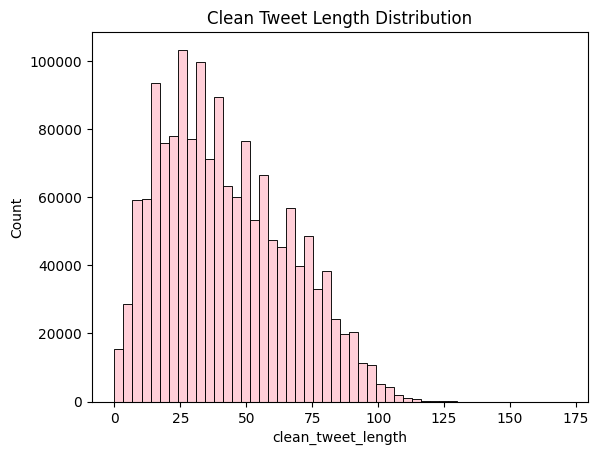

In [ ]:
sns.histplot(twitter_data['clean_tweet_length'], bins=50, color='pink')
plt.title("Clean Tweet Length Distribution")
plt.show()

Visual Comparision between 'Original Tweet Length' and 'Clean Tweet Length'

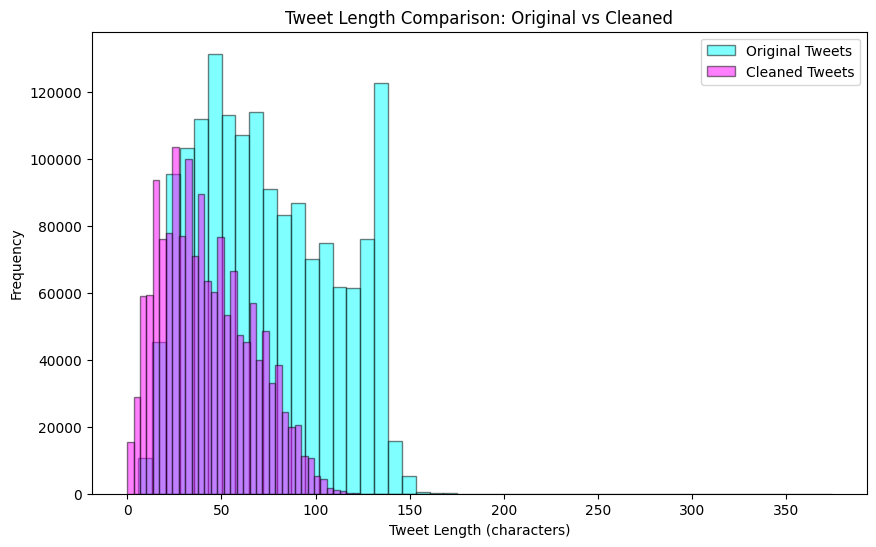

In [ ]:
# Plot comparison
plt.figure(figsize=(10,6))
plt.hist(twitter_data['tweet_length'], bins=50, alpha=0.5, label='Original Tweets', color='cyan', edgecolor='black')
plt.hist(twitter_data['clean_tweet_length'], bins=50, alpha=0.5, label='Cleaned Tweets', color='magenta', edgecolor='black')

plt.title('Tweet Length Comparison: Original vs Cleaned')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
twitter_data['target'].value_counts()

,count
target,
1,791281
0,790185


**DistilBERT**

Creating a sample of 100000 tweets and applying the DistilBERT on it

In [ ]:
# Install required libraries
!pip install transformers datasets scikit-learn --quiet

In [ ]:
# installing upgraded form

!pip install --upgrade transformers

In [ ]:
# Take equal samples from both classes
df_sample = twitter_data.groupby('target', group_keys=False).apply(
    lambda x: x.sample(n=50000, random_state=42)
).sample(frac=1, random_state=42).reset_index(drop=True)

print(df_sample['target'].value_counts())

target
1    50000
0    50000
Name: count, dtype: int64


/tmp/ipython-input-3640066345.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sample = twitter_data.groupby('target', group_keys=False).apply(


In [ ]:
df_sample.shape

(100000, 6)

In [ ]:
df_sample.head()

,target,text,tweet_length,length_category,clean_tweet,clean_tweet_length
0,1,@eloc_jess fifteen isn't too bad although I u...,121,101-150,fifteen isnt bad although understand might con...,78
1,1,"Coffee in one hand, iron in the other ... Sund...",107,101-150,coffee one hand iron sunday good must stop twe...,62
2,0,@J_Vegas exactly!!! She on her sh*it 2! She ne...,138,101-150,exactly shit never pjs always dressed amp tann...,88
3,1,@henrobules: Ok we should hang out this weeken...,138,101-150,ok hang weekend need give debate form need giv...,61
4,1,Just for the chauvinistic banter you'll have t...,65,51-100,chauvinistic banter youll follow,32


In [ ]:
# installing upgraded form

!pip install --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 94.1 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.55.0
    Uninstalling transformers-4.55.0:
      Successfully uninstalled transformers-4.55.0


In [ ]:
import transformers
print(transformers.__version__)
print(transformers.__file__)


4.55.2
/usr/local/lib/python3.11/dist-packages/transformers/__init__.py


In [ ]:
!pip uninstall -y transformers
!pip install --no-cache-dir transformers==4.55.2


Found existing installation: transformers 4.55.2
Uninstalling transformers-4.55.2:
  Successfully uninstalled transformers-4.55.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 140.7 MB/s eta 0:00:00


In [ ]:
import transformers
print(transformers.__version__)


4.55.2


In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
from torch.optim import AdamW
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import pandas as pd

# ---------------------------
# 1. Dataset Class
# ---------------------------
class TweetDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=64):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        item = {key: val.squeeze(0) for key, val in encoding.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

# ---------------------------
# 2. Create df_sample (balanced subset)
# ---------------------------
n_per_class = 50000  # 100k total
df_pos = twitter_data[twitter_data['target'] == 1].sample(n=n_per_class, random_state=42)
df_neg = twitter_data[twitter_data['target'] == 0].sample(n=n_per_class, random_state=42)
df_sample = pd.concat([df_pos, df_neg]).sample(frac=1, random_state=42).reset_index(drop=True)

train_texts, test_texts, train_labels, test_labels = train_test_split(
    df_sample['clean_tweet'].tolist(),
    df_sample['target'].tolist(),
    test_size=0.2,
    random_state=42
)

# ---------------------------
# 3. Tokenizer & Datasets
# ---------------------------
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
train_dataset = TweetDataset(train_texts, train_labels, tokenizer)
test_dataset = TweetDataset(test_texts, test_labels, tokenizer)

# ---------------------------
# 4. Model & Device
# ---------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)
model.to(device)

# ---------------------------
# 5. Dataloaders
# ---------------------------
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# ---------------------------
# 6. Optimizer
# ---------------------------
optimizer = AdamW(model.parameters(), lr=5e-5)

# ---------------------------
# 7. Training Loop
# ---------------------------
epochs = 2
for epoch in range(epochs):
    # Training
    model.train()
    loop = tqdm(train_loader, leave=True)
    for batch in loop:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        loop.set_description(f"Epoch {epoch+1}")
        loop.set_postfix(loss=loss.item())

    # Evaluation after each epoch
    model.eval()
    preds, true_labels = [], []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1)

            preds.extend(predictions.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(true_labels, preds)
    print(f"\nEpoch {epoch+1} Test Accuracy: {acc:.4f}")
    print(classification_report(true_labels, preds))


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1: 100%|██████████| 5000/5000 [08:10<00:00, 10.19it/s, loss=0.294]



Epoch 1 Test Accuracy: 0.7865
              precision    recall  f1-score   support

           0       0.78      0.80      0.79     10078
           1       0.79      0.78      0.78      9922

    accuracy                           0.79     20000
   macro avg       0.79      0.79      0.79     20000
weighted avg       0.79      0.79      0.79     20000



Epoch 2: 100%|██████████| 5000/5000 [08:08<00:00, 10.23it/s, loss=0.142]



Epoch 2 Test Accuracy: 0.7788
              precision    recall  f1-score   support

           0       0.82      0.72      0.77     10078
           1       0.75      0.83      0.79      9922

    accuracy                           0.78     20000
   macro avg       0.78      0.78      0.78     20000
weighted avg       0.78      0.78      0.78     20000



**LOGISTIC REGRESSION MODEL (WITH HYPERPARAMETER TUNING)**

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# 1️⃣ Take a random sample of 50k tweets
df_sample = twitter_data.groupby('target', group_keys=False).apply(lambda x: x.sample(n=25000, random_state=42)).sample(frac=1, random_state=42).reset_index(drop=True)

X = df_sample['clean_tweet']
y = df_sample['target']

# 2️⃣ Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3️⃣ TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 4️⃣ Logistic Regression with hyperparameter tuning
lr = LogisticRegression(solver='saga', max_iter=2000, random_state=42)

'''
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],   # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet'],  # Regularization type
    'l1_ratio': [0, 0.5, 1]  # Only used if penalty='elasticnet'
}
'''
param_grid = {
    'C': [0.1, 1, 10],      # smaller set
    'penalty': ['l1','l2'], # remove elasticnet
}

grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_tfidf, y_train)

print("Best Parameters:", grid_search.best_params_)

# 5️⃣ Evaluate on test set
best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(X_test_tfidf)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


/tmp/ipython-input-871566658.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sample = twitter_data.groupby('target', group_keys=False).apply(lambda x: x.sample(n=25000, random_state=42)).sample(frac=1, random_state=42).reset_index(drop=True)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'C': 1, 'penalty': 'l1'}
Test Accuracy: 0.7528
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      5000
           1       0.74      0.78      0.76      5000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



**COMPARING ALL MODELS**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Making a dictionary of all the model's accuracies

model_accuracies = {
    'Logistic Regression' : 0.7823354221072799,
    'Logistic Regression (Tuned)' : 0.7841976136126515,
    'XGBOOST' : 0.7427772894838347,
    'Random Forest' : 0.7194034663951893,
    'Naive Bayes' : 0.7689586271001031,
    'Support Vector Machine (SVM)' : 0.7834546339797783,
    'Maximum Entropy Model (MaxEnt)' : 0.7846402397769164,
    'Neural Network (MLP)' : 0.7762493123486377,
    'Ensemble Classifier (Voting)' : 0.783701239985583,
    'DistilBERT' : 0.7865

}

# Extract names and scores
models = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

**BAR CHART**

/tmp/ipython-input-3241495940.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


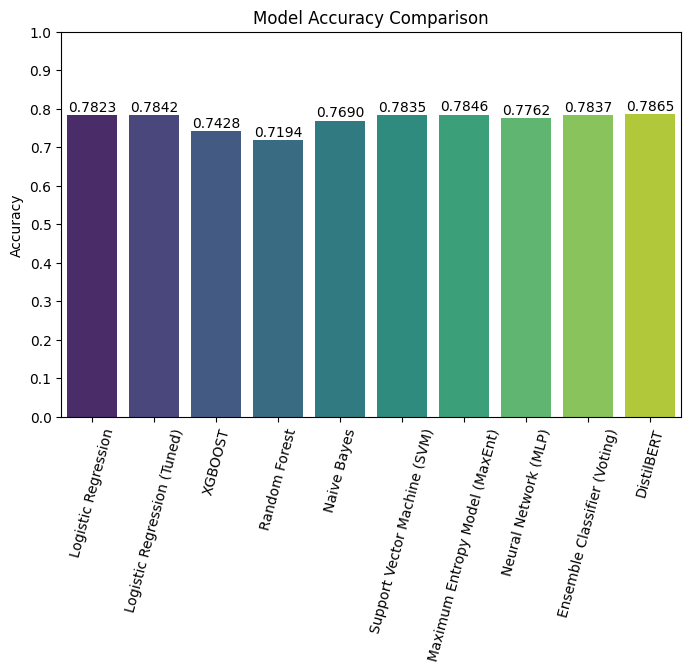

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=75)

plt.gca().yaxis.set_major_locator(MultipleLocator(0.1))

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.4f}", ha='center')

**PIE CHART**

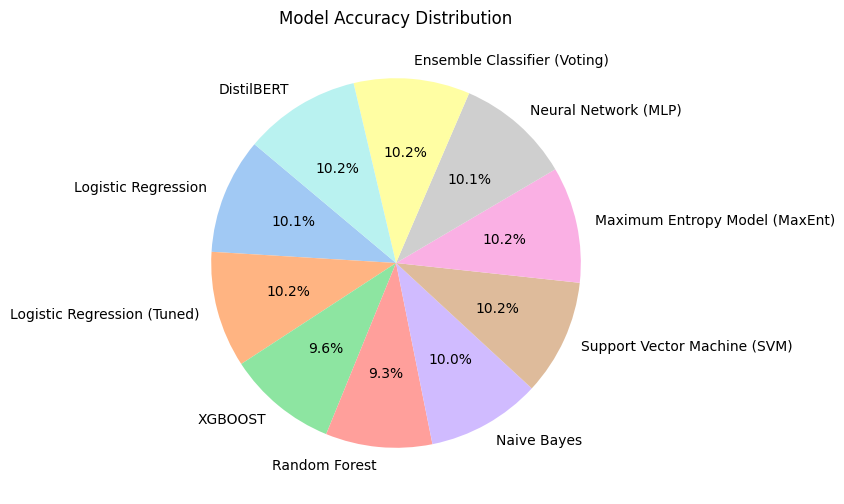

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(accuracies, labels=models, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel", len(models)))
plt.title("Model Accuracy Distribution")
plt.show()

**HISTOGRAM**

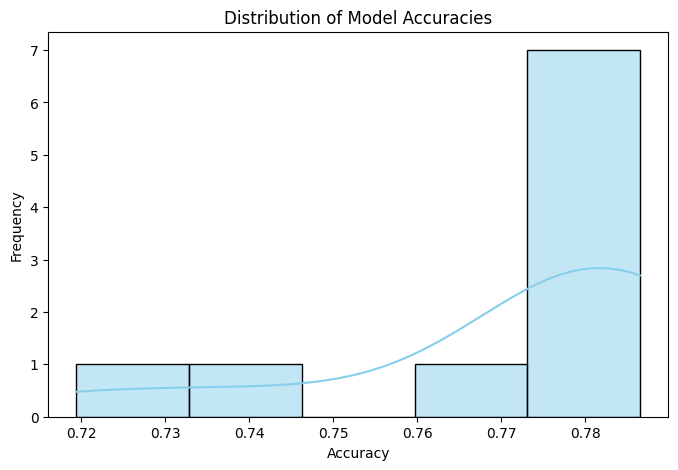

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(accuracies, bins=5, kde=True, color='skyblue', edgecolor='black')
plt.title("Distribution of Model Accuracies")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.show()

**BEST ACCURACY MODEL - DistilBERT (Hugging Face model)**

**Accuracy = 78.65 %**